## Keras Tutorial !

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# # load dataset
# dataframe = pandas.read_csv("boston-housing/train.csv")
# dataset = dataframe.values
# X = dataset[:, 1:14]
# Y = dataset[:,14]

In [3]:
# # load dataset
# dataframe = pandas.read_csv("boston-housing/train.csv")
# dataset = dataframe.values
# X_train = dataset[:, 1:14]
# Y_train = dataset[:,14]

In [4]:
# _mean = X_train.mean()
# _std = X_train.std()
# print(_mean)
# print(_std)

## Loading Random Dataset of dimension ( 5000 , 1286 )

In [5]:
# Random Dataset
X = np.random.rand(5000,1286)
Y = np.random.rand(5000)

### Pre-processing of Data !

In [6]:
# Normalization of DataSet
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [7]:
# train test split
X_train, Y_train = X[:4000], Y[:4000]     
X_test, Y_test = X[4000:], Y[4000:] 

## We are using sequential keras model !

In [8]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1286))

/home/abhijeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1286, units=1)`
  


#### Loss function used by Keras are 

1. mean_squared_error
        keras.losses.mean_squared_error(y_true, y_pred)
        
        
2. mean_absolute_error
        keras.losses.mean_absolute_error(y_true, y_pred)
        
        
3. mean_absolute_percentage_error
        keras.losses.mean_absolute_percentage_error(y_true, y_pred)
        
        
4. mean_squared_logarithmic_error
        keras.losses.mean_squared_logarithmic_error(y_true, y_pred)
        
        
5. squared_hinge
        keras.losses.squared_hinge(y_true, y_pred)
        
        
6. hinge
        keras.losses.hinge(y_true, y_pred)
        
        
7. categorical_hinge
        keras.losses.categorical_hinge(y_true, y_pred)
        
        
8. logcosh
        keras.losses.logcosh(y_true, y_pred)


#### Optimizer used by keras

1. sgd - Stochastic Gradient Descent 

In [9]:
model.compile(loss='mae', optimizer='sgd')

In [10]:
train_loss = []
import time
tic = time.time()
print('Training -----------')
for step in range(1500):
    cost = model.train_on_batch(X_train, Y_train)
    train_loss.append((step,cost))
    if step % 100 == 0:
        print('train cost: ', cost)
toc = time.time()
print(toc - tic)

Training -----------
train cost:  1.2154078
train cost:  0.54246193
train cost:  0.26583663
train cost:  0.1954455
train cost:  0.18216082
train cost:  0.17828996
train cost:  0.17690656
train cost:  0.17634426
train cost:  0.17601396
train cost:  0.17587204
train cost:  0.17577219
train cost:  0.1756858
train cost:  0.1756361
train cost:  0.17564625
train cost:  0.17569013
11.127307415008545


In [11]:
train_loss = np.array(train_loss)

In [12]:
x = train_loss[:,0]
y = train_loss[:,1]

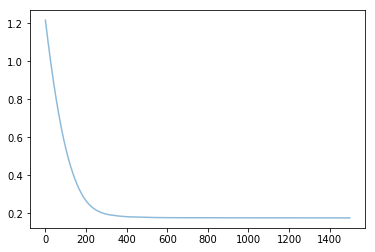

In [13]:
import matplotlib.pyplot as plt
plt.plot(x, y, alpha=0.5)
plt.show()


In [14]:
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=1)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)
print(model.summary)


Testing ------------
1000/1000 [==============================] - 0s 294us/step
test cost: 0.33121413876116274
Weights= [[ 0.00213385]
 [-0.00641304]
 [ 0.00409301]
 ...
 [ 0.01158657]
 [ 0.00199732]
 [ 0.00204375]] 
biases= [0.50164986]
<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f3af92201d0>>


In [15]:
Y_pred = model.predict(X_test)

###  Metrics of accuracy !!

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

print("explained variance score is :", explained_variance_score(Y_pred, Y_test, multioutput='uniform_average'))
print("mean absolute error is : ",mean_absolute_error(Y_pred, Y_test))
print("mean squared error is : ",mean_squared_error(Y_pred, Y_test))
print("r2 score is : ", r2_score(Y_test, Y_pred) )


explained variance score is : -1.2091406505060611
mean absolute error is :  0.3312141386926007
mean squared error is :  0.16480648602465614
r2 score is :  -0.9785566640769379
